In [1]:
import pandas as pd
import numpy as np
from others.robustness_dataset import RobustnessDataset

# Load the data into a pandas DataFrame
df = pd.read_csv("../cifar10_tss.csv")
df.sort_values(by='acc', ascending=False, inplace=True)
df.reset_index()
df = df.head(1200)
print(df.columns)

data = RobustnessDataset(path="robustness-dataset")
edge_1 = []
for idx in df.index:
    arch = data.id_to_string(int(idx))
    print(arch)
    edge_1.append(arch.split('+')[2][1:-1].split("|")[0])
    # print(edge_1)
df["edge1"] = edge_1


ModuleNotFoundError: No module named 'others'

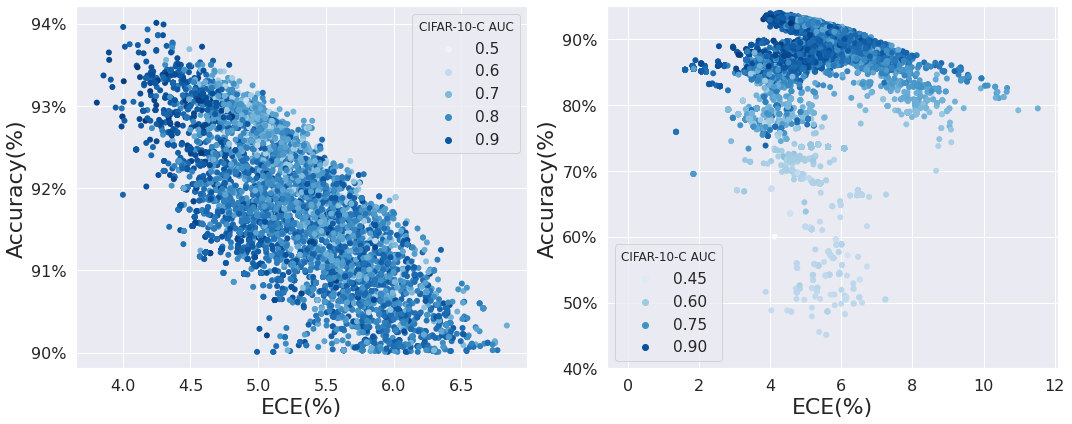

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
sns.set(style="whitegrid")
sns.set(font_scale=1.4)
df_all = pd.read_csv("../cifar10_tss.csv")
# df_all.sort_values(by='acc', ascending=False, inplace=True)
# df_all.reset_index()
df_high_acc = df_all[df_all['acc'] > 0.9]

# df_top1200 = df_all.head(1200)

fontsize = 22
legend_title_fontsize = 12
red_map = sns.color_palette("Blues", as_cmap=True)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
tick_fontsize = 16
# Scatter plot with top 1200 points
sns.scatterplot(x="pre_ECE_15", y="acc", hue="auc_cifar10c", data=df_high_acc, ax=ax[0], linewidth=0, palette=red_map)
ax[0].set_xlabel("ECE(%)", fontsize=fontsize)
ax[0].set_ylabel("Accuracy(%)", fontsize=fontsize)
ax[0].legend(title="CIFAR-10-C AUC", title_fontsize=legend_title_fontsize)
ax[0].set_yticks(np.arange(0.9, 0.945, 0.01))

# Scatter plot with all points
scatter_plot = sns.scatterplot(x="pre_ECE_15", y="acc", hue="auc_cifar10c", data=df_all, ax=ax[1], linewidth=0, palette=red_map)
ax[1].set_xlabel("ECE(%)", fontsize=fontsize)
ax[1].set_ylabel("Accuracy(%)", fontsize=fontsize)
ax[1].legend(title="CIFAR-10-C AUC", title_fontsize=legend_title_fontsize)
scatter_plot.set_ylim(0.4, 0.95)

formatter_1 = ticker.FuncFormatter(lambda x, _: f'{x*100:.1f}')
formatter_2 = ticker.FuncFormatter(lambda x, _: f'{x*100:.0f}')
y_formatter = ticker.FuncFormatter(lambda x, _: f'{x*100:.0f}%')


for i, axes in enumerate(ax):
    if i == 0:
        axes.xaxis.set_major_formatter(formatter_1)
    else:
        axes.xaxis.set_major_formatter(formatter_2)
    axes.yaxis.set_major_formatter(y_formatter)
    axes.tick_params(axis='both', labelsize=tick_fontsize)

plt.tight_layout()
# plt.savefig('./ood_auroc_withece.pdf', dpi=1000)
plt.show()
